In [1]:
import pandas as pd
import pdvega
from scipy import stats  # the tests themselves
# encode categories as numbers, used in t-test
from sklearn.preprocessing import LabelEncoder

# Loading the data

Here we take the DataFrame from the main experiment, this is the result of doing `statsdf.to_dict()`

In [13]:
# load the data from the main notebook, to use it in this isolated environment
df = pd.DataFrame({'Age': {0: '27..35', 1: '18..26', 2: '18..26', 3: '18..26', 4: '18..26', 5: '18..26', 6: '18..26', 7: '18..26', 8: '18..26', 9: '27..35', 10: '18..26', 11: '18..26', 12: '27..35', 13: '18..26', 14: '18..26', 15: '18..26', 16: '45..53', 17: '18..26', 18: '27..35', 19: '27..35', 20: '27..35', 21: '27..35', 22: '27..35', 23: '18..26', 24: '18..26', 25: '27..35', 26: '18..26', 27: '27..35', 28: '54 and above', 29: '27..35', 30: '18..26'}, 'Device': {0: 'beta', 1: 'alpha', 2: 'beta', 3: 'alpha', 4: 'alpha', 5: 'beta', 6: 'alpha', 7: 'alpha', 8: 'alpha', 9: 'beta', 10: 'beta', 11: 'alpha', 12: 'beta', 13: 'beta', 14: 'alpha', 15: 'alpha', 16: 'alpha', 17: 'beta', 18: 'beta', 19: 'alpha', 20: 'alpha', 21: 'beta', 22: 'alpha', 23: 'beta', 24: 'beta', 25: 'alpha', 26: 'beta', 27: 'beta', 28: 'alpha', 29: 'beta', 30: 'beta'}, 'Errors adjusted': {0: 2, 1: 0, 2: 3, 3: 5, 4: 2, 5: 11, 6: 0, 7: 1, 8: 2, 9: 2, 10: 2, 11: 3, 12: 11, 13: 3, 14: 0, 15: 9, 16: 0, 17: 3, 18: 2, 19: 1, 20: 2, 21: 1, 22: 4, 23: 2, 24: 2, 25: 7, 26: 6, 27: 3, 28: 0, 29: 0, 30: 2}, 'Errors total': {0: 3.0, 1: 1.0, 2: 4.0, 3: 5.0, 4: 2.0, 5: 11.0, 6: 1.0, 7: 2.0, 8: 3.0, 9: 3.0, 10: 3.0, 11: 3.0, 12: 11.0, 13: 4.0, 14: 0.0, 15: 9.0, 16: 0.0, 17: 4.0, 18: 3.0, 19: 2.0, 20: 2.0, 21: 1.0, 22: 4.0, 23: 3.0, 24: 2.0, 25: 7.0, 26: 7.0, 27: 4.0, 28: 1.0, 29: 1.0, 30: 3.0}, 'Gender': {0: 'M', 1: 'M', 2: 'F', 3: 'F', 4: 'M', 5: 'M', 6: 'M', 7: 'M', 8: 'M', 9: 'M', 10: 'F', 11: 'F', 12: 'F', 13: 'M', 14: 'M', 15: 'F', 16: 'F', 17: 'M', 18: 'F', 19: 'F', 20: 'F', 21: 'M', 22: 'M', 23: 'F', 24: 'F', 25: 'F', 26: 'F', 27: 'M', 28: 'F', 29: 'F', 30: 'M'}, 'Participant': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31}, 'Skill': {0: 'intermediate', 1: 'expert', 2: 'novice', 3: 'intermediate', 4: 'expert', 5: 'intermediate', 6: 'intermediate', 7: 'expert', 8: 'expert', 9: 'expert', 10: 'expert', 11: 'expert', 12: 'expert', 13: 'expert', 14: 'expert', 15: 'expert', 16: 'expert', 17: 'intermediate', 18: 'novice', 19: 'novice', 20: 'novice', 21: 'intermediate', 22: 'expert', 23: 'novice', 24: 'expert', 25: 'intermediate', 26: 'novice', 27: 'expert', 28: 'novice', 29: 'intermediate', 30: 'intermediate'}})

# Encoding categorical data into numbers

This is required for running statistical tests

In [3]:
coder = LabelEncoder()

df['Gender_code'] = coder.fit_transform(df['Gender'])
df['Skill_code'] = coder.fit_transform(df['Skill'])
df['Age_code'] = coder.fit_transform(df['Age'])
df['Device_code'] = coder.fit_transform(df['Device'])

## The data

This is what the data frame looks like. Columns with `error` in their title reflect how many errors each participant made while answering the questions of the survey, they represent the key data of the analysis.

We focus on the *total* number of errors, which is a conservative interpretation of the results, that treats skipped questions as errors. The *adjusted* number relates to a softer interpretation of the data, that gives participants the benefit of doubt in the following cases:
- off by one errors when counting how many entities have access to collected data
- off by one errors when counting until which year the collected data are available
- assuming that *marketing offers* and *targeted advertisements* were treated as the same thing

This *adjustment* slightly improves the score of poor performers, but gives no advantage to those who had correct answers anyway. The adjusted error rate is not what the conclusions are based on, it is just an exploration of the data set.

In [4]:
df

,Age,Device,Errors adjusted,Errors total,Gender,Participant,Skill,Gender_code,Skill_code,Age_code,Device_code
0,27..35,beta,2,3.0,M,1,intermediate,1,1,1,1
1,18..26,alpha,0,1.0,M,2,expert,1,0,0,0
2,18..26,beta,3,4.0,F,3,novice,0,2,0,1
3,18..26,alpha,5,5.0,F,4,intermediate,0,1,0,0
4,18..26,alpha,2,2.0,M,5,expert,1,0,0,0
5,18..26,beta,11,11.0,M,6,intermediate,1,1,0,1
6,18..26,alpha,0,1.0,M,7,intermediate,1,1,0,0
7,18..26,alpha,1,2.0,M,8,expert,1,0,0,0
8,18..26,alpha,2,3.0,M,9,expert,1,0,0,0
9,27..35,beta,2,3.0,M,10,expert,1,0,1,1


# Normality test

Check if we have a normal distribution of results. We're specifically interested in whether our *errors* follow such a distribution or not. We do this with the `Shapiro-Wilk` test, which is suitable for samples of our size:

In [5]:
w_stat, p_value = stats.shapiro(df['Errors total'])

# it assumes the distribution is normal, if p_value is below 0.05, we can reject that assumption
distribution = 'NOT normal' if p_value < 0.05 else 'normal'
print(f'pvalue={p_value}, w_stat={w_stat}, the sample distribution is: {distribution}')

# the R equivalent would be
# shapiro.test(x)

pvalue=0.00033012405037879944, w_stat=0.8411508798599243, the sample distribution is: NOT normal


The plot below gives us a visual confirmation of the verdict:

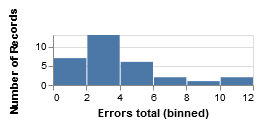

In [14]:
df['Errors total'].vgplot(kind='hist', width=200, height=50,)

## Looking for correlations between categories and error rates

Used tests:

- *t-test*, as the sample size is >=10
- *Wilcoxon rank sum test*, as the sample size <= 20


Checking whether skills are correlated with gender, using a *t-test* for independent observations:

In [7]:
male_skills = df[df['Gender']=='M']['Skill_code']
female_skills = df[df['Gender']=='F']['Skill_code']


t_stat, p_gender_skill = stats.ttest_ind(female_skills, male_skills)
significance = p_gender_skill < 0.05
print(f'pvalue={p_gender_skill}, t_stat={t_stat}, Significant: {significance}')

pvalue=0.020984394356376845, t_stat=2.441039049400744, Significant: True


We find that they are, and it is indeed the case, as our only *novice* participants were females.

Does the error rate correlate with *gender*? Using the same *t-test* here, and a *Wilcoxon rank-sum test*:

In [8]:
male_errors = df[df['Gender']=='M']['Errors total']
female_errors = df[df['Gender']=='F']['Errors total']

t_stat, p_gender_errors = stats.ttest_ind(female_errors, male_errors)
significance = p_gender_errors < 0.05
print(f't-test:\t\tpvalue={p_gender_errors}, t_stat={t_stat}, Significant: {significance}')

t_stat, p_gender_errors = stats.ranksums(female_errors, male_errors)
print(f'Wilcoxon:\tpvalue={p_gender_errors}, t_stat={t_stat}, Significant: {significance}')

t-test:		pvalue=0.40051940662279617, t_stat=0.853239172253179, Significant: False
Wilcoxon:	pvalue=0.5532299666570705, t_stat=0.5929270612815711, Significant: False


Neither test showed any significant difference, which is a good thing, because that's what was expected.

Does the *device type* correlate with the error rate? Using the *t-test* again:

In [9]:
alpha_errors = df[df['Device']=='alpha']['Errors total']
beta_errors = df[df['Device']=='beta']['Errors total']

t_stat, p_device_errors = stats.ttest_ind(alpha_errors, beta_errors)
significance = p_device_errors < 0.05
print(f'pvalue={p_device_errors}, t_stat={t_stat}, Significant: {significance}')

pvalue=0.17615946022345227, t_stat=-1.386508035427704, Significant: False


### Correlations between categories with >=3 elements

In this case we'll be using the Kruskall-Wallis test, because:
- we have 3 categories of skill levels, as well as multiple categories of ages
- this test is suitable for non-normally distributed samples
- the dependent variable, *number of errors*, is a continuous one

In [11]:
novice_errors = df[df['Skill'] == 'novice']['Errors total']
intermediate_errors = df[df['Skill'] == 'intermediate']['Errors total']
expert_errors = df[df['Skill'] == 'expert']['Errors total']

statistic, p_value = stats.kruskal(novice_errors, intermediate_errors, expert_errors)
significance = p_value < 0.05
print(f'pvalue={p_value}, statistic={statistic}, Significant differences: {significance}')

pvalue=0.8886223207976632, statistic=0.23616593946948258, Significant differences: False


No significant differences were found between these categories (otherwise we'd have to use some other test, e.g. `Bonferroni`, to find exactly which categories are correlated to the score.

#### Now we use the same test to find age-related correlations

*45..53* and *54+* were merged into a single category called *45 and above*, because we only have one participant for each of them.

In [12]:
err_18_26 = df[df['Age'] == '18..26']['Errors total']
err_27_35 = df[df['Age'] == '27..35']['Errors total']
err_45_above = df[df['Age_code'] > 2]['Errors total']

statistic, p_value = stats.kruskal(err_18_26, err_27_35, err_45_above)
significance = p_value < 0.05
print(f'pvalue={p_value}, statistic={statistic}, Significant differences: {significance}')

pvalue=0.3994255828182329, statistic=1.835455613852932, Significant differences: False


No correlations were found here either.

# Conclusion

We did not find any correlations between the categories of survey participants and their performance, measured as the number of errors made in the questionnaire.